# Estratégia Evolutiva
#### Com base no material de Luis Martí, [IC](http://www.ic.uff.br)/[UFF](http://www.uff.br)



In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries texlive-latex-base xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] ='\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

## Revisão de Estatística

* [Variável aleatória] (http://en.wikipedia.org/wiki/Random_variable): uma variável cujo valor está sujeito a variações devido ao __acaso__. Uma variável aleatória pode assumir um conjunto de possíveis valores diferentes, cada um com uma probabilidade associada, em contraste com outras variáveis matemáticas.

* [Distribuição de probabilidade](http://en.wikipedia.org/wiki/Probability_distribution): função matemática que descreve os possíveis valores de uma variável aleatória e suas probabilidades associadas.

* [Função de densidade de probabilidade(pdf)](http://en.wikipedia.org/wiki/Probability_density_function) de um __variável aletória contínua__ é  uma função que descreve a probabilidade relativa de uma variável aleatório assumir um valor dado.
     * A probabilidade da variável aleatória estar dentro de uma faixa específica de valores é dada pela integral da densidade dessa variável nessa faixa.
     * A função densidade de probabilidade é não negativa em todos os lugares e sua integralidade em todo o espaço é igual a um.

<img src='http://upload.wikimedia.org/wikipedia/commons/2/25/The_Normal_Distribution.svg' width='50%' align='center'/>


### [Moments](http://en.wikipedia.org/wiki/Moment_(mathematics)

A distribuição de probabilidade de uma variável aleatória é frequentemente caracterizada por um pequeno número de parâmetros, que também têm uma interpretação prática.

* [Média](http://en.wikipedia.org/wiki/Mean) (também conhecido como valor esperado) refere-se a uma medida da tendência central, seja de uma distribuição de probabilidade ou da variável aleatória caracterizada por essa distribuição.
    * média da população:

$$
\mu = \operatorname{E}[X]
$$

* estimativa da média da amostra:

$$ \bar{x} $$

* [Desvio padrão](http://en.wikipedia.org/wiki/Standard_deviation) mede a quantidade de variação ou dispersão da média.

    * desvio populacional:
    $$
\sigma = \sqrt{\operatorname E[X^2]-(\operatorname E[X])^2} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}.
$$
    * estimador imparcial:
    $$
    s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2.
    $$

### Duas amostras

In [ ]:
sample1 = np.random.normal(0, 0.5, 10000)
#print(sample1.size)
sample2 = np.random.normal(1,1,500)

In [ ]:
def plot_normal_sample(sample, mu, sigma):
    'Plots um histograma e a distribuição normal conforme os parâmetros.'
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'b', lw=2)
    plt.hist(sample, 30, density = True, alpha=0.2)
    plt.annotate('3$\sigma$',
                     xy=(mu + 3*sigma, 0),  xycoords='data',
                     xytext=(0, 100), textcoords='offset points',
                     fontsize=15,
                     arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc,angleA=180,armA=20,angleB=90,armB=15,rad=7"))
    plt.annotate('-3$\sigma$',
                     xy=(mu -3*sigma, 0), xycoords='data',
                     xytext=(0, 100), textcoords='offset points',
                     fontsize=15,
                     arrowprops=dict(arrowstyle="->",
                                     connectionstyle="arc,angleA=180,armA=20,angleB=90,armB=15,rad=7"))

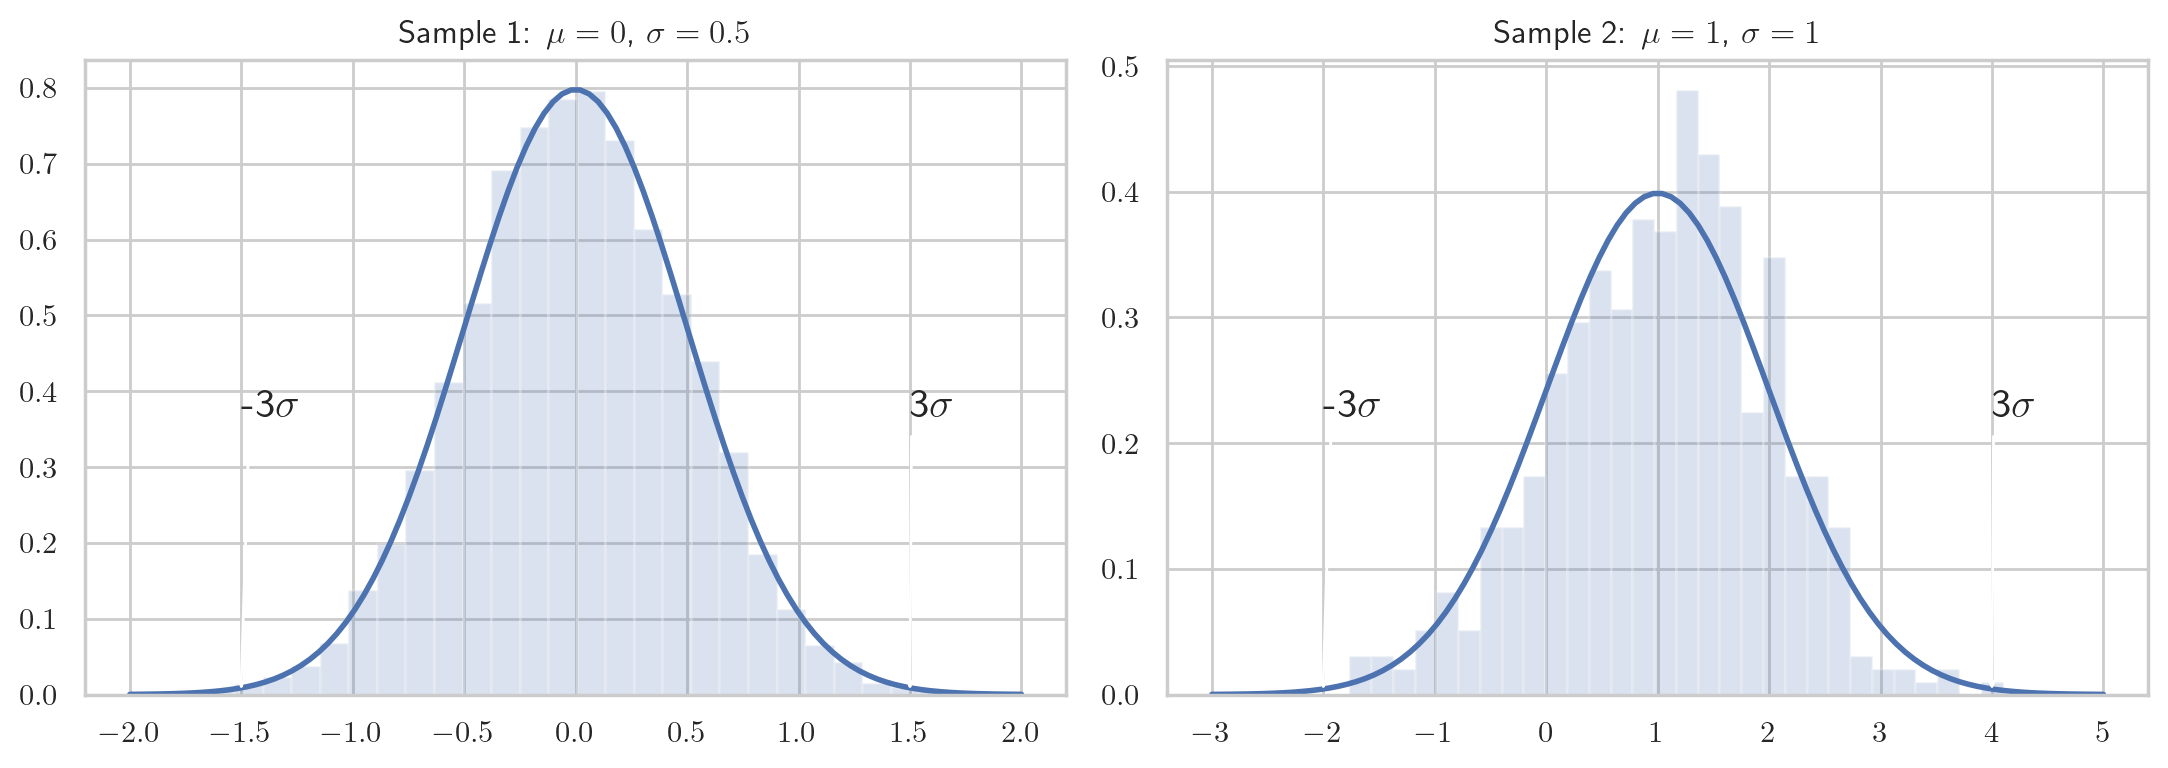

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_normal_sample(sample1, 0, 0.5)
plt.title('Sample 1: $\mu=0$, $\sigma=0.5$')
plt.subplot(122)
plot_normal_sample(sample2, 1, 1)
plt.title('Sample 2: $\mu=1$, $\sigma=1$')
plt.tight_layout();

In [ ]:
print('Sample 1; estimated mean:', sample1.mean(), ' and std. dev.: ', sample1.std())
print('Sample 2; estimated mean:', sample2.mean(), ' and std. dev.: ', sample2.std())

Sample 1; estimated mean: -0.00023976026269153117  and std. dev.:  0.49783592422300244
Sample 2; estimated mean: 1.039186979324691  and std. dev.:  0.9684804611313944


[Covariância](http://en.wikipedia.org/wiki/Covariance) é uma medida de quanto duas variáveis aleatórias mudam juntas.
$$
\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]},
$$
$$
\operatorname{cov}(X,X) = s(X),
$$

* O sinal da covariância mostra, portanto, a tendência na relação linear entre as variáveis.
* A magnitude da covariância não é fácil de interpretar.
* A versão normalizada da covariância, o coeficiente de correlação, no entanto, mostra por sua magnitude a força da relação linear.

### Entendendo Covariância

In [ ]:
sample_2d = np.array(list(zip(sample1, np.ones(len(sample1))))).T

In [ ]:
sample_2d = np.array(list(zip(sample1, sample2))).T

In [ ]:
sample_2d

array([[ 7.48717618e-01, -4.24958357e-01, -1.62690703e-01,
        -1.60432054e-01,  6.12051979e-01,  7.88756569e-01,
         3.56023172e-01,  5.40434782e-01, -1.67488055e-01,
        -8.03280007e-01, -5.79069619e-02,  4.00098909e-01,
         6.40609090e-01, -9.31035761e-01, -8.93649697e-02,
        -1.61028010e-01, -9.35209366e-01, -8.05745689e-01,
         1.29393251e-01, -7.94245513e-01, -5.16487041e-01,
        -1.72908016e-02,  2.38393621e-01,  5.51470107e-01,
         5.85817206e-01,  3.14736014e-01, -1.77034294e-01,
         1.54310534e-01,  7.74449340e-01,  5.91157343e-01,
         1.61904717e+00,  9.75781757e-01, -2.42865298e-01,
        -1.20685004e-01, -3.31586799e-01,  7.72819654e-01,
         3.46582254e-01, -7.17570828e-01,  7.15050375e-01,
        -7.29993918e-01,  6.42055562e-01, -9.87354701e-01,
         4.55512652e-01, -4.35781253e-01,  5.80792230e-01,
         2.25926665e-01,  1.74339375e-01,  1.29487663e-01,
         7.34883802e-01,  3.81248341e-01, -3.70914366e-0

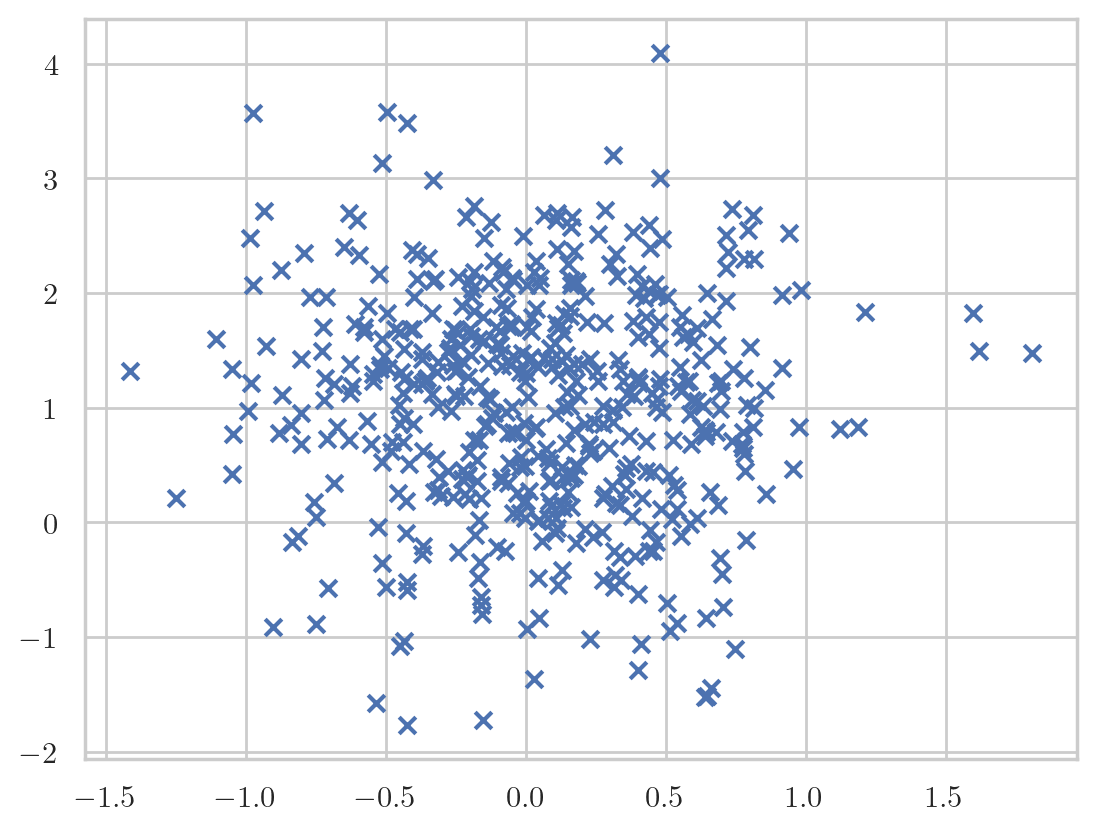

In [ ]:
plt.scatter(sample_2d[0,:], sample_2d[1,:], marker='x');

In [ ]:
np.cov(sample_2d) # computes covariance between the two components of the sample

array([[ 0.23094102, -0.01892223],
       [-0.01892223,  0.93983407]])

Como a amostra é distribuída apenas ao longo de um eixo, a covariância não detecta nenhuma relação entre eles.

O que acontece quando nós rotacionamos a amostra?

In [ ]:
def rotate_sample(sample, angle=-45):
    'Rotates a sample by `angle` degrees.'
    theta = (angle/180.) * np.pi
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])
    return sample.T.dot(rot_matrix).T

In [ ]:
rot_sample_2d = rotate_sample(sample_2d)

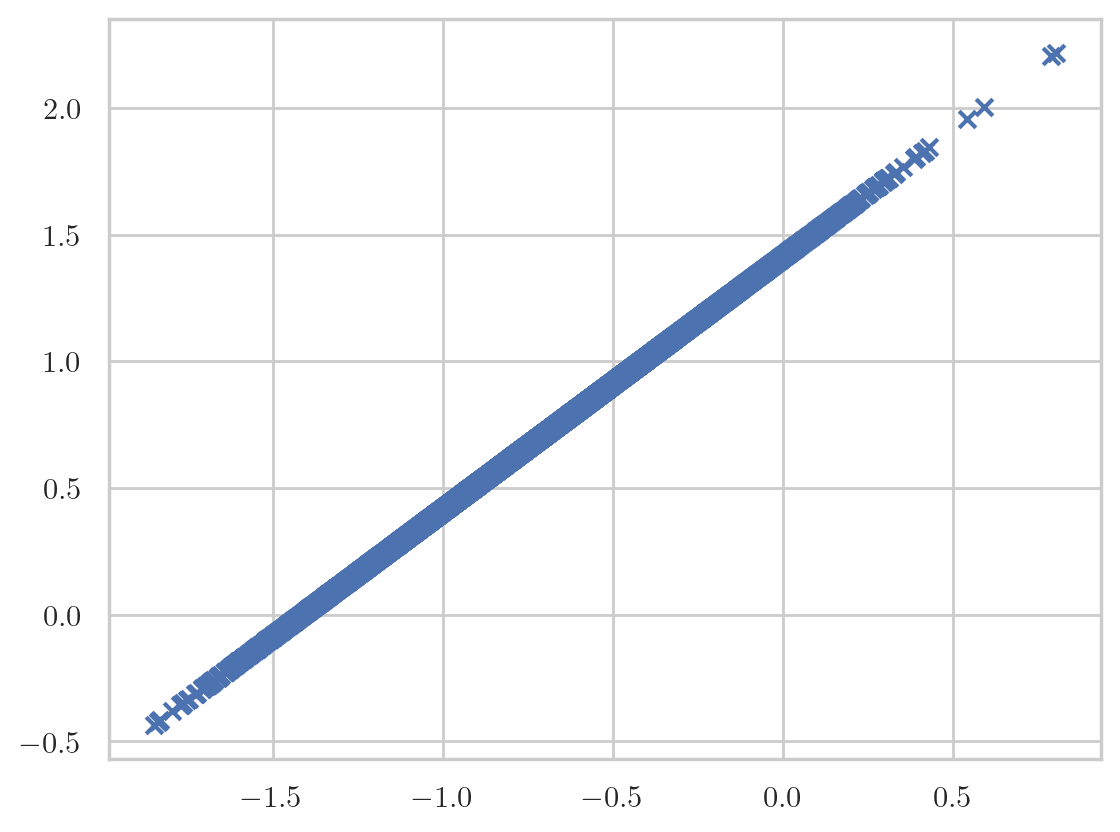

In [ ]:
plt.scatter(rot_sample_2d[0,:], rot_sample_2d[1,:], marker='x');

In [ ]:
np.cov(rot_sample_2d)

array([[0.12479493, 0.12479493],
       [0.12479493, 0.12479493]])

### Uma variável bidimensional normalmente distribuída

<ipython-input-15-56e52f0ab975>:15: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(x, y, rv.pdf(pos), cmap=cm.viridis_r, lw=4)


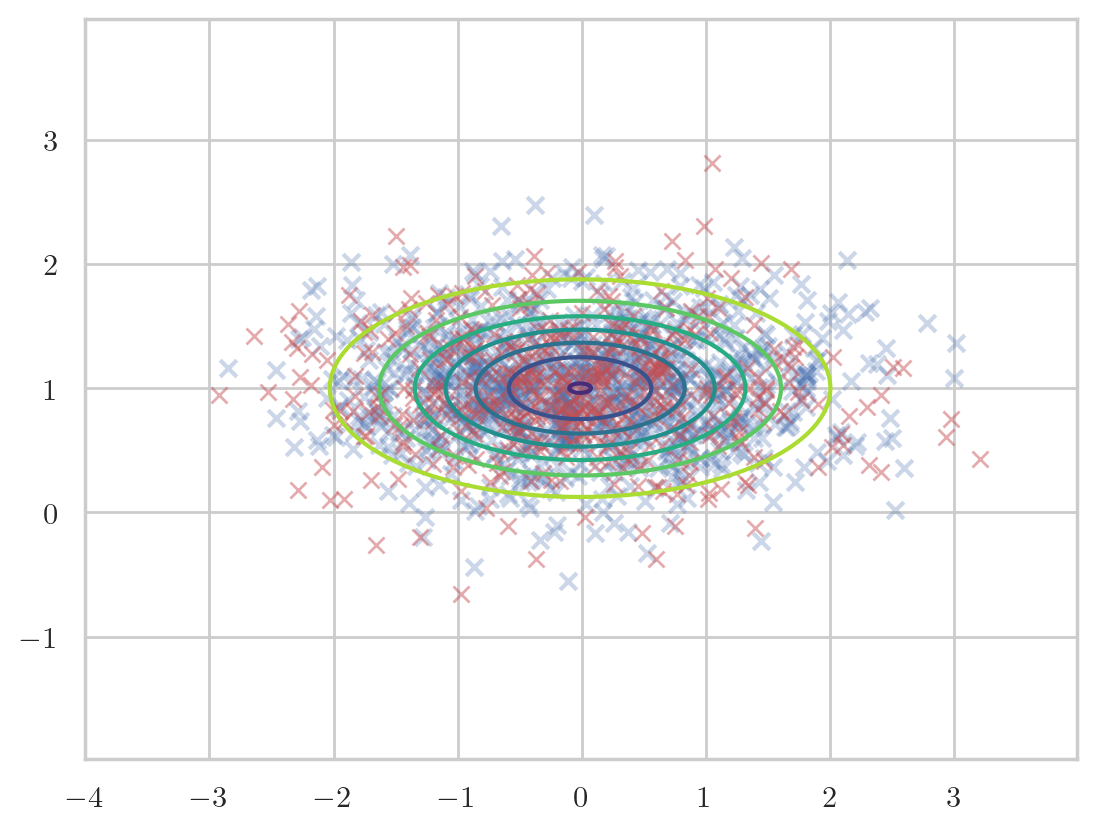

In [ ]:
mu = [0,1]
cov = [[1,0],[0,0.2]] # diagonal covariance, points lie on x or y-axis
sample = np.random.multivariate_normal(mu,cov,1000).T
plt.scatter(sample[0], sample[1], marker='x', alpha=0.29)

estimated_mean = sample.mean(axis=1)
estimated_cov = np.cov(sample)
e_x,e_y = np.random.multivariate_normal(estimated_mean,estimated_cov,500).T

plt.plot(e_x,e_y,'rx', alpha=0.47)
x, y = np.mgrid[-4:4:.01, -1:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(estimated_mean, estimated_cov)
plt.contour(x, y, rv.pdf(pos), cmap=cm.viridis_r, lw=4)
plt.axis('equal');

### Este é melhor visualizado em 3D

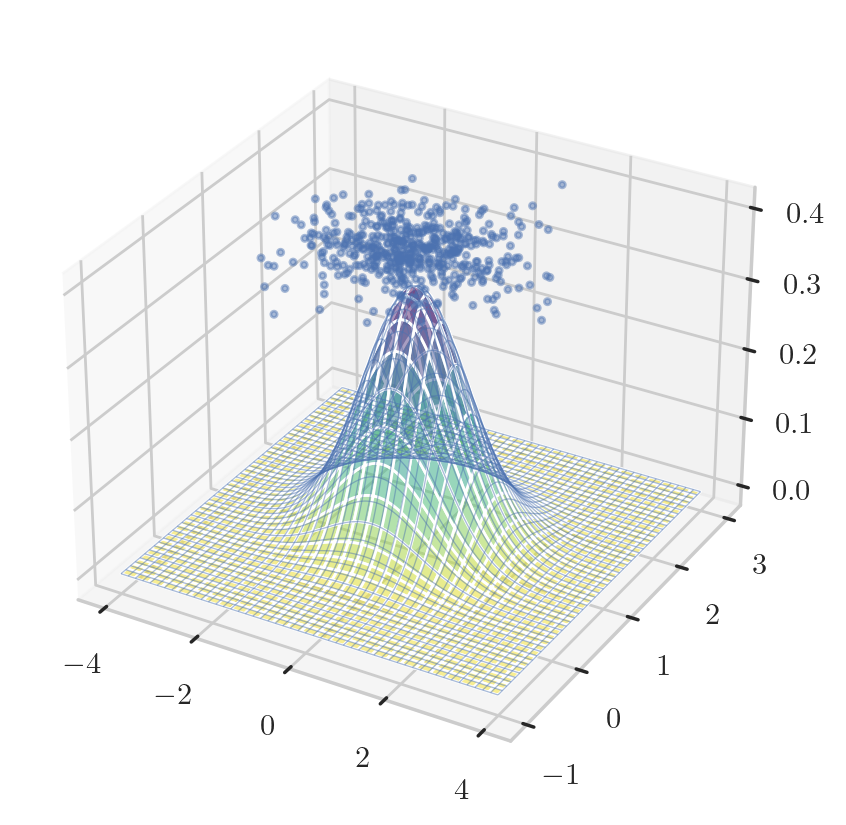

In [ ]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap=cm.viridis_r, rstride=30, cstride=10, linewidth=1, alpha=0.47)
ax.plot_wireframe(x, y, rv.pdf(pos), linewidth=0.47, alpha=0.47)
ax.scatter(e_x, e_y, 0.4, marker='.', alpha=0.47)
ax.axis('tight');

# Estratégias Evolutivas

Desenvolvido: Alemanha na década de 1970

Nomes antigos: I. Rechenberg, H.-P. Schwefel

Normalmente aplicado a:

*   otimização numérica

Recursos atribuídos:

* velozes
* bom otimizador para otimização com valor real
* relativamente muita teoria

Especial:

* auto-adaptação dos parâmetros (mutação) padrão

# Estratégias Evolutivas

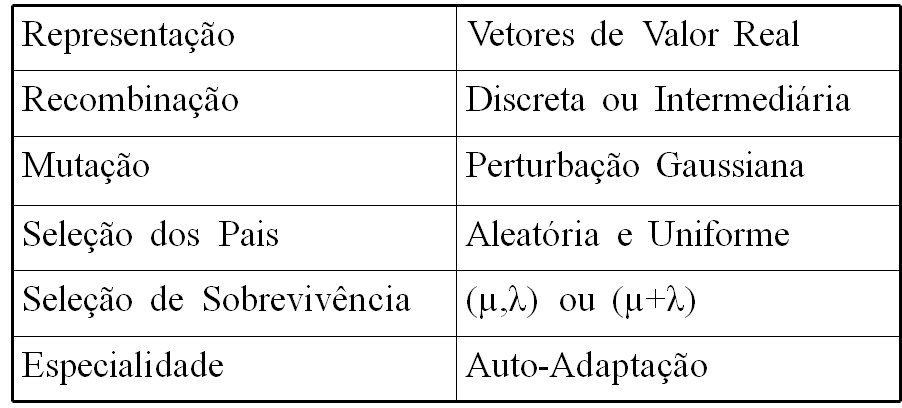

#Exemplo Introdutório

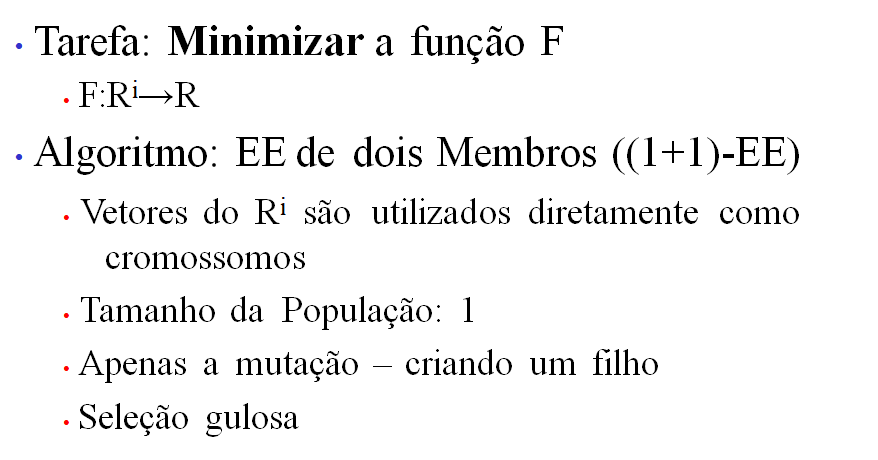

#Pseudo código
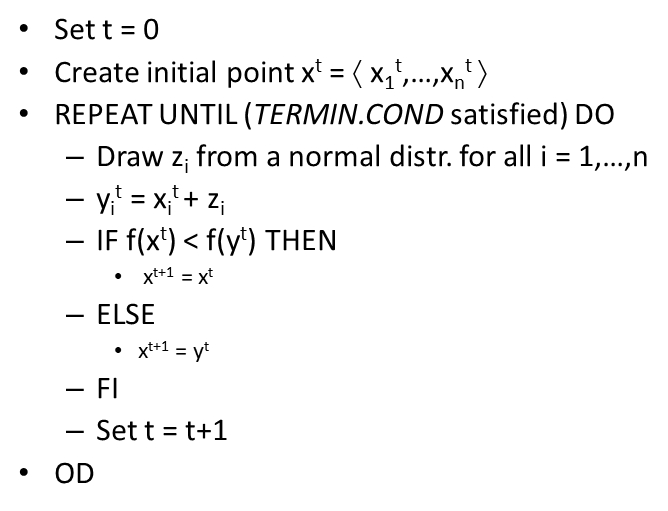

#Mutação
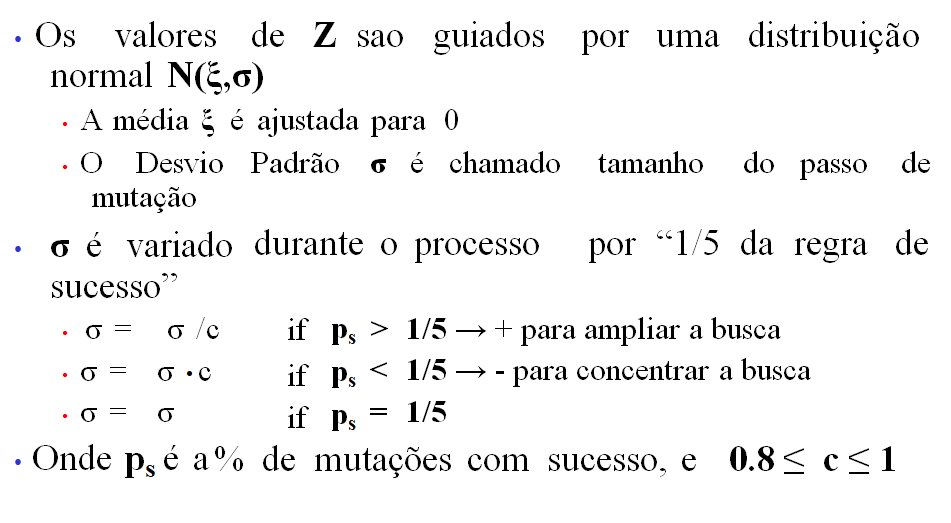

### Função a ser otimizada:


![Função Ackley](https://www.sfu.ca/~ssurjano/boha.png)

### [Bohachevsky benchmark problem](http://deap.readthedocs.org/en/latest/api/benchmarks.html#deap.benchmarks.bohachevsky)

$$\text{minimize } f(\mathbf{x}) = \sum_{i=1}^{N-1}(x_i^2 + 2x_{i+1}^2 - 0.3\cos(3\pi x_i) - 0.4\cos(4\pi x_{i+1}) + 0.7), \mathbf{x}\in \left[-10,10\right]^n,$$

  * Optimum in $\mathbf{x}=\mathbf{0}$, $f(\mathbf{x})=0$.

In [ ]:
# Function: Bohachevsky
def bohachevsky(x, y):
    return x**2 + 2 * y**2 - 0.3 * np.cos(3 * np.pi * x) - 0.4 * np.cos(4 * np.pi * y) + 0.7

Plot da superfície

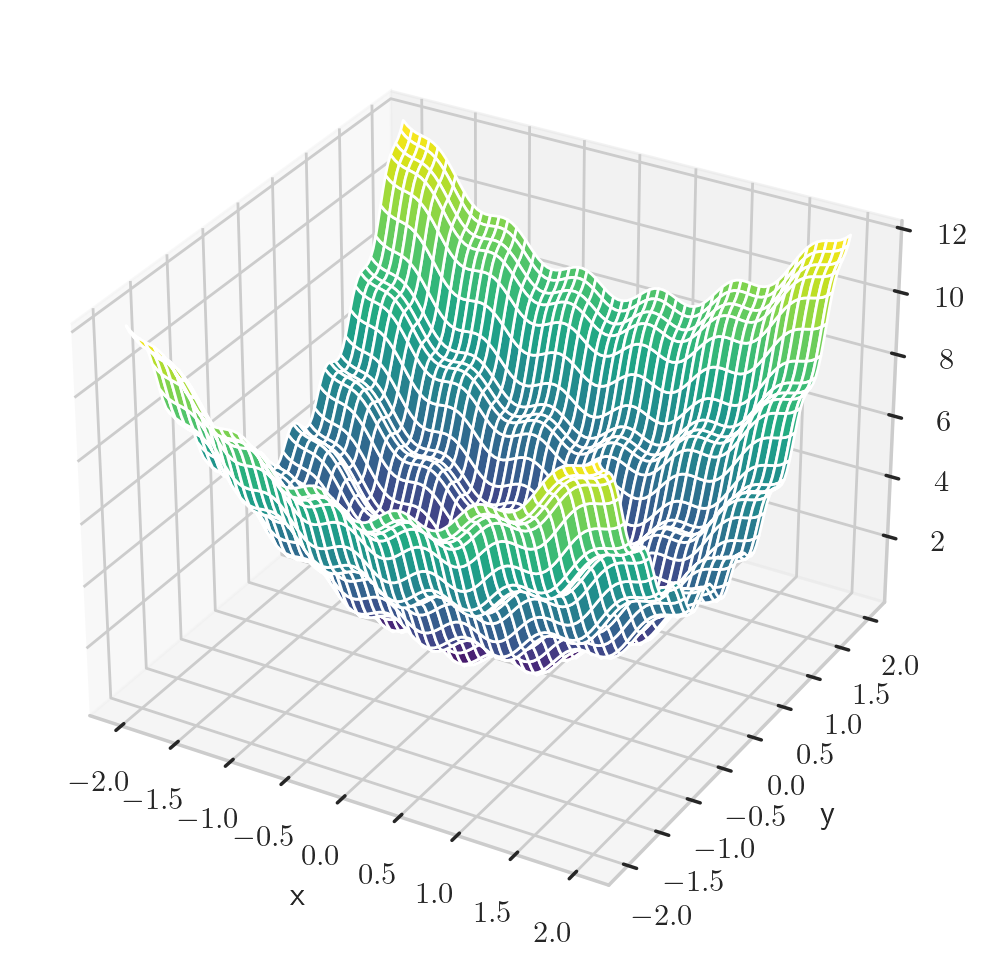

In [ ]:
def plot_bohachevsky(l_bound, u_bound):
    # Visualização da superfície da função
    x_vals = np.linspace(l_bound, u_bound, 100)
    y_vals = np.linspace(l_bound, u_bound, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = bohachevsky(X, Y)
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Fitness')
    # Exibir o gráfico 3D
    plt.show()

l_bound = -2
u_bound = 2
plot_bohachevsky(l_bound, u_bound)

# (1+1) - ES

Na implementação a seguir é utilizado um sigma fixo, ou seja, a mutação sempre ocorrerá com o mesmo tamanho de passo. **Teste diferentes tamanhos de sigma para observar o comportamento da solução e compare os resultados obtidos**.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def list_to_dict(my_list):
    my_dict = {}
    for value in my_list:
        my_dict[value] = None
    return my_dict

In [53]:
# Parâmetros do algoritmo
sigma_list = [x / 10 for x in range(1, 11)]
iterations = 10000  # Número de iterações
fit_dict = list_to_dict(sigma_list)

for sigma in sigma_list:

    # Inicialização
    l_bound = -2
    u_bound = 2
    x = np.random.uniform(l_bound, u_bound)  # Valor inicial de x
    y = np.random.uniform(l_bound, u_bound)  # Valor inicial de y

    best_fitness = bohachevsky(x, y)  # Melhor fitness inicial
    fitness = list(range(iterations))

    # Iterações
    for i in range(iterations):
        # Mutação
        x_new = x + np.random.normal(0, sigma)  # Mutação em x
        y_new = y + np.random.normal(0, sigma)  # Mutação em y

        # Avaliação do fitness
        fitness[i] = bohachevsky(x_new, y_new)

        # Atualização da solução
        if fitness[i] <= best_fitness:
            x = x_new
            y = y_new
            best_fitness = fitness[i]

        # Armazenar os valores do fitness e sigma para visualização
        fitness[i] = best_fitness

    fit_dict[sigma] = (fitness, x, y)

In [55]:
import plotly.graph_objects as go

# Plotagem do fitness ao longo das iterações
fig = go.Figure()

for key, values in fit_dict.items():
    fig.add_trace(go.Scatter(x=list(range(iterations)), y=values[0], name=f"sigma = {key}"))

fig.update_layout(
    title="Evolução do Fitness - (1 + 1)-ES",
    xaxis_title="Iteração",
    yaxis_title="Fitness",
    width=800,
    height=400
)
fig.show()

In [56]:
best_fitness = 10000000
best_sigma = 0

for key, values in fit_dict.items():
    if values[0][-1] < best_fitness:
        x = values[1]
        y = values[2]
        best_fitness = values[0][-1]
        best_sigma = key

# Resultado
print("Melhor solução encontrada:")
print("sigma = ", sigma)
print("x = ", x)
print("y = ", y)
print("Fitness = ", best_fitness)

Melhor solução encontrada:
sigma =  1.0
x =  -0.0013337130562335597
y =  -0.0006744285626639473
Fitness =  4.0754173829093965e-05


In [59]:
fastest_sigma = 0
fastest_index = 1000000

for key, values in fit_dict.items():
    for i in range(iterations):
        if values[0][i] < 0.05:
            if i < fastest_index:
                fastest_sigma = key
                fastest_index = i

print(fastest_sigma)
print(fastest_index)

0.3
29


Comparando os diversos valores de sigma, podemos notar que aparentemente o valor de sigma é melhor quando mais alto para achar um mínimo global. O que significa que parece existir uma relação direta entre sigma e o valor do fitness ao fim do experimento. Não chega a ser uma relação estatística mas sempre que rodamos o menor fitness está com algum dos maiores sigmas, enquanto os maiores fitness estão com os menores sigmas.

Isso não significa também que o maior sigma vai ser o mais rápido a chegar num valor suficientemente ótimo, como na célula acima nos mostra que, dado um treshold, o sigma $0.3$ foi o que convergiu mais rápido para esse valor, então se precisássemos de uma solução "boa o suficiente" ao invés de uma solução ótima, então o sigma parece fazer pouca diferença, uma vez que apresenta um comportamento suficientemente aleatório.

# $(1+\lambda)$ - ES
Nesta implementação, para cada melhor solução encontrada são gerados lambda descendentes. **Gere uma cópia e altere a implementação abaixo para considerar a regra de 1/5 de sucesso para ajustar o sigma e otimizar a busca. Imprima um gráfico com a evolução do sigma**

#### layout

Melhor solução encontrada:
x = 0.0001640924025691394
y = -0.0001944770629262453
Fitness = 1.6558345765638194e-06


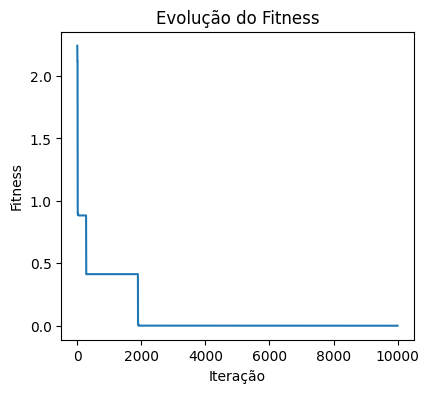

In [ ]:
# Algorithm parameters
sigma = 0.1  # Mutation step size
lambda_ = 10  # Number of offspring
iterations = 10000  # Number of iterations

# Inicialização
l_bound = -2
u_bound = 2
x = np.random.uniform(l_bound, u_bound)  # Valor inicial de x
y = np.random.uniform(l_bound, u_bound)  # Valor inicial de y

best_fitness = bohachevsky(x, y)  # Melhor fitness inicial

fitness = list(range(iterations))

# Iterations
for i in range(iterations):
    # Offspring generation
    offspring_x = [x + np.random.normal(0, sigma) for _ in range(lambda_)]
    offspring_y = [y + np.random.normal(0, sigma) for _ in range(lambda_)]

    # Evaluate fitness of offspring
    offspring_fitness = [bohachevsky(off_x, off_y) for off_x, off_y in zip(offspring_x, offspring_y)]

    # Select best offspring
    best_offspring_index = np.argmin(offspring_fitness)
    best_offspring_fitness = offspring_fitness[best_offspring_index]
    best_offspring_x = offspring_x[best_offspring_index]
    best_offspring_y = offspring_y[best_offspring_index]

    # Update the solution
    if best_offspring_fitness <= best_fitness:
        x = best_offspring_x
        y = best_offspring_y
        best_fitness = best_offspring_fitness
    #atualize o valor de sigma

    # Armazenar os valores do fitness e sigma para visualização
    fitness[i] = best_fitness

# Plotagem do fitness e sigma ao longo das iterações
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(iterations), fitness)
plt.xlabel("Iteração")
plt.ylabel("Fitness")
plt.title("Evolução do Fitness")


# Resultado
print("Melhor solução encontrada:")
print("x =", x)
print("y =", y)
print("Fitness =", best_fitness)

plt.show()

#### resposta

In [96]:
# Algorithm parameters
sigma = 1.0  # Mutation step size
lambda_ = 10  # Number of offspring
iterations = 10000  # Number of iterations
success_count = 0
c = 0.87 # 87 é do Flamengo
sigma_in_time = []

# Inicialização
l_bound = -2
u_bound = 2
x = np.random.uniform(l_bound, u_bound)  # Valor inicial de x
y = np.random.uniform(l_bound, u_bound)  # Valor inicial de y

best_fitness = bohachevsky(x, y)  # Melhor fitness inicial

fitness = list(range(iterations))

# Iterations
for i in range(iterations):

    # Offspring generation
    offspring_x = [x + np.random.normal(0, sigma) for _ in range(lambda_)]
    offspring_y = [y + np.random.normal(0, sigma) for _ in range(lambda_)]

    # Evaluate fitness of offspring
    offspring_fitness = [bohachevsky(off_x, off_y) for off_x, off_y in zip(offspring_x, offspring_y)]

    # Select best offspring
    best_offspring_index = np.argmin(offspring_fitness)
    best_offspring_fitness = offspring_fitness[best_offspring_index]
    best_offspring_x = offspring_x[best_offspring_index]
    best_offspring_y = offspring_y[best_offspring_index]

    # Update the solution
    if best_offspring_fitness <= best_fitness:
        x = best_offspring_x
        y = best_offspring_y
        best_fitness = best_offspring_fitness
        success_count += 1

    #atualize o valor de sigma
    p = success_count / (i+1)

    if p < 0.2:
        sigma *= c
    elif p > 0.2:
        sigma /= c
    else:
        pass

    # Armazenar os valores do fitness e sigma para visualização
    fitness[i] = best_fitness
    sigma_in_time.append(sigma)

In [97]:
# Plotagem do fitness ao longo das iterações
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(iterations)), y=fitness, name=f"Fitness"))

fig.update_layout(
    title="Evolução do Fitness (1 + λ)-ES",
    xaxis_title="Iteração",
    yaxis_title="Fitness",
    width=600,
    height=400
)
fig.show()

In [98]:
# Plotagem do fitness ao longo das iterações
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(iterations)), y=sigma_in_time, name=f"Sigma"))

fig.update_layout(
    title="Evolução do Sigma (1 + λ)-ES",
    xaxis_title="Iteração",
    yaxis_title="Sigma",
    width=600,
    height=400
)
fig.show()

Rodando esse experimento várias vezes, ficou nítida a natureza estocástica do problema, pois com o mesmo código o sigma mostrou um comportamento nada padronizado. A versão que resolvemos enviar é essa que mostra o processo de expansão e contração da busca quando o modelo está a muito tempo sem ter uma mutação bem sucedida.

# Outros Modelos de Estratégias Evolutivas

---
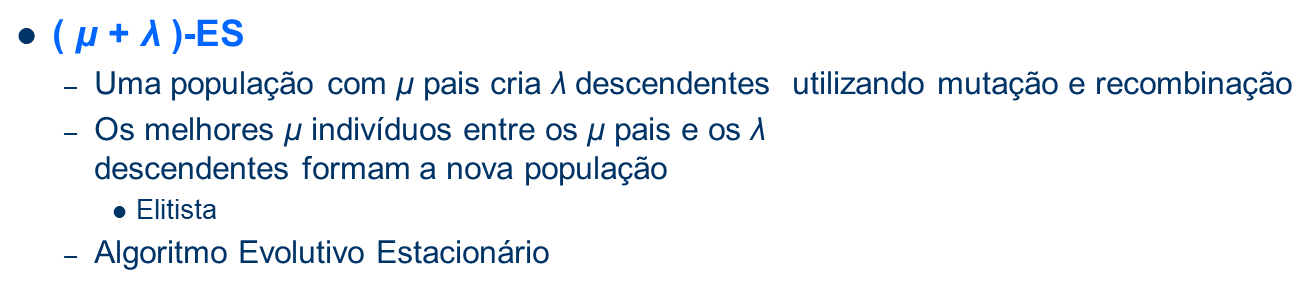


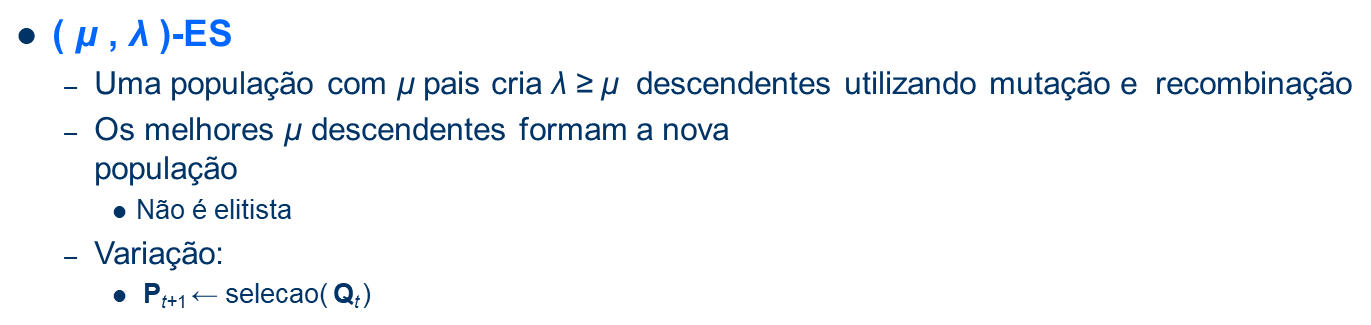

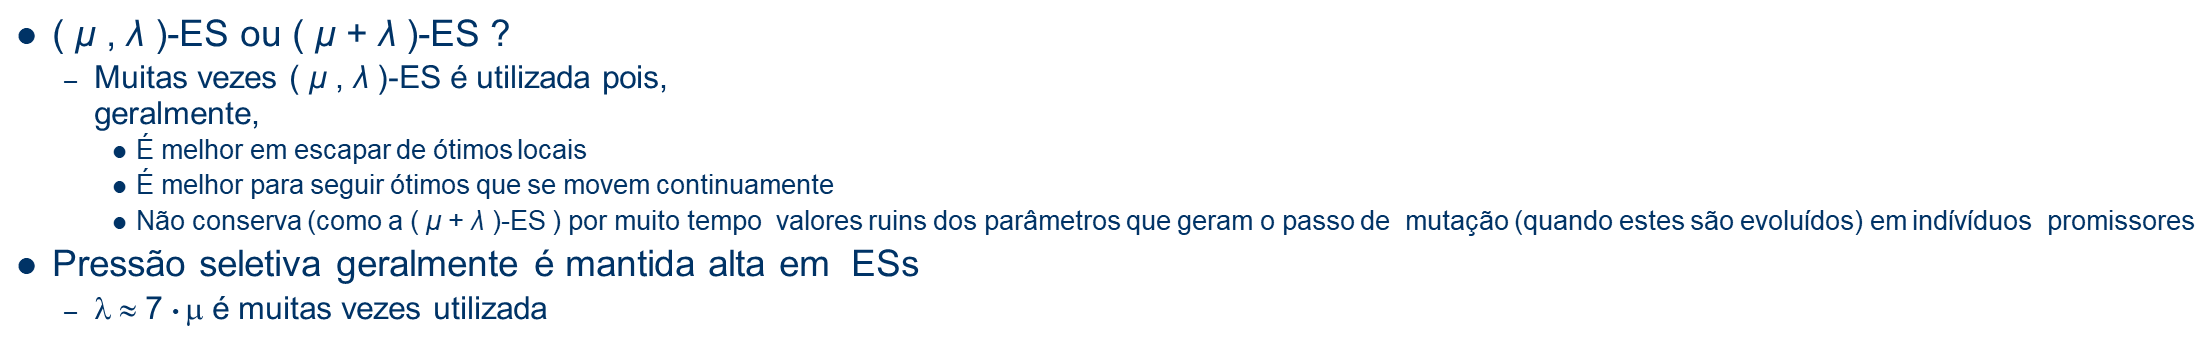

#$(\mu,\lambda)$ - ES
A seguir consta implementação do modelo $(\mu,\lambda)$ - ES.
A partir desta implementação, gere uma cópia e implemente a solução $(\mu+\lambda)$ - ES e utilize uma estratégia para atualizar o sigma. Compare o desempenho das duas versões da ES para o problema.

#### layout

Melhor solução encontrada:
x = -0.612211018641428
y = -0.0011459090931825594
Fitness = 0.41349783703930715


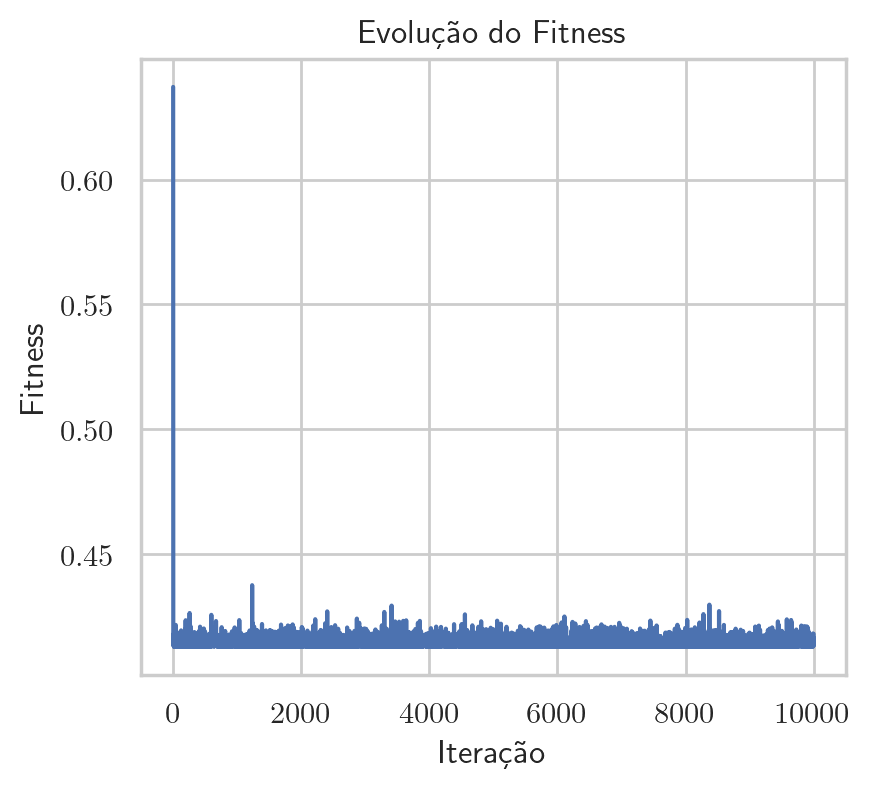

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do algoritmo
mu = 10  # Tamanho da população de pais
lmbda = 70  # Tamanho da população de descendentes
sigma = 0.05  # Tamanho da mutação
iterations = 10000  # Número de iterações

# Inicialização
l_bound = -2
u_bound = 2
population_x = np.random.uniform(l_bound, u_bound, (mu,))  # População inicial de x
population_y = np.random.uniform(l_bound, u_bound, (mu,))  # População inicial de y

fitness = np.zeros((mu,))  # Fitness dos indivíduos
best_fitness = np.zeros((iterations,))
# Iterações
for i in range(iterations):
    # Avaliação do fitness
    for j in range(mu):
        fitness[j] = bohachevsky(population_x[j], population_y[j])

    # Mutação e recombinação dos descendentes
    descendants_x = np.zeros((lmbda,))
    descendants_y = np.zeros((lmbda,))
    for j in range(lmbda):
        parent_index = j % mu  # Índice do pai a ser utilizado
        descendants_x[j] = population_x[parent_index] + np.random.normal(0, sigma)
        descendants_y[j] = population_y[parent_index] + np.random.normal(0, sigma)


    # Avaliação do fitness dos descendentes
    descendants_fitness = np.zeros((lmbda,))
    for j in range(lmbda):
        descendants_fitness[j] = bohachevsky(descendants_x[j], descendants_y[j])

    # Seleção dos melhores indivíduos
    sorted_indices = np.argsort(descendants_fitness)
    population_x = descendants_x[sorted_indices[:mu]].copy()
    population_y = descendants_y[sorted_indices[:mu]].copy()

    # Encontrar a melhor solução
    best_index = np.argmin(fitness)
    best_x = population_x[best_index]
    best_y = population_y[best_index]
    best_fitness[i] = fitness[best_index]

# Plotagem do fitness ao longo das iterações
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(iterations), best_fitness)
plt.xlabel("Iteração")
plt.ylabel("Fitness")
plt.title("Evolução do Fitness")

# Resultado
print("Melhor solução encontrada:")
print("x =", best_x)
print("y =", best_y)
print("Fitness =", bohachevsky(best_x, best_y))

plt.show()

#### resposta

In [140]:
best_fitness_layout = best_fitness

In [141]:
# Parâmetros do algoritmo
mu = 10  # Tamanho da população de pais
lmbda = 70  # Tamanho da população de descendentes
sigma = 0.05  # Tamanho da mutação
c = 0.87 # 87 é do Flamengo
sigma_in_time = []
iterations = 10000  # Número de iterações
success_count = 0
change_indexes = []

# Inicialização
l_bound = -2
u_bound = 2
population_x = np.random.uniform(l_bound, u_bound, (mu,))  # População inicial de x
population_y = np.random.uniform(l_bound, u_bound, (mu,))  # População inicial de y

fitness = np.zeros((mu,))  # Fitness dos indivíduos
best_fitness = np.zeros((iterations,))
# Iterações
for i in range(iterations):
    # Avaliação do fitness
    for j in range(mu):
        fitness[j] = bohachevsky(population_x[j], population_y[j])

    # Mutação e recombinação dos descendentes
    descendants_x = population_x
    descendants_y = population_y
    for j in range(lmbda):
        parent_index = j % mu  # Índice do pai a ser utilizado
        descendants_x = np.append(descendants_x, [population_x[parent_index] + np.random.normal(0, sigma)])
        descendants_y = np.append(descendants_y, [population_y[parent_index] + np.random.normal(0, sigma)])

    # Avaliação do fitness dos descendentes
    descendants_fitness = np.zeros((lmbda + mu,))
    for j in range(lmbda + mu):
        descendants_fitness[j] = bohachevsky(descendants_x[j], descendants_y[j])

    # Seleção dos melhores indivíduos
    sorted_indices = np.argsort(descendants_fitness)
    success_count += mu - sum(1 for i in range(mu) if sorted_indices[i] < mu) # contando quantas mutações tiveram sucesso
    population_x = descendants_x[sorted_indices[:mu]].copy()
    population_y = descendants_y[sorted_indices[:mu]].copy()

    if mu - sum(1 for i in range(mu) if sorted_indices[i] < mu) > 0:
        change_indexes.append(i)
    #atualize o valor de sigma
    p = success_count / (i+1)

    if p < 0.2:
        sigma *= c
    elif p > 0.2:
        sigma /= c
    else:
        pass

    # Encontrar a melhor solução
    best_index = np.argmin(fitness)
    best_x = population_x[best_index]
    best_y = population_y[best_index]
    best_fitness[i] = fitness[best_index]
    sigma_in_time.append(sigma)

No lugar de iniciar uma população de filhos com um array cheia de zeros, nossa array de filhos já começa sendo os pais, assim já colocamos os pais no processo de seleção da próxima geração.

In [144]:
# Plotagem do fitness ao longo das iterações
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(iterations)), y=best_fitness, name=f"Best Fitness (μ + λ)-ES"))
fig.add_trace(go.Scatter(x=list(range(iterations)), y=best_fitness_layout, name=f"Best Fitness (μ, λ)-ES"))

fig.update_layout(
    title="Evolução do Fitness (μ + λ)-ES vs (μ, λ)-ES",
    xaxis_title="Iteração",
    yaxis_title="Sigma",
    width=600,
    height=400
)
fig.show()

Comparando as duas soluções, podemos inferir que o código adicionando a estratégia do sigma e mudando o tipo de algoritmo é superior para resolver esse problema. Não está claro se é a estratégia de sigma que causa isso ou se é o algoritmo diferente. A impressão que fica é que ambos podem estar corroborando para o resultado superior, mas a hipótese mais forte aparenta ser a de que ao preservar a informação de uma solução que já pode ser boa, fica mais fácil convergir para um ótimo global, enquanto que na solução onde a informação dos pais não são preservadas fica presa em um ótimo local.

In [143]:
# Plotagem do sigma ao longo das iterações
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(iterations)), y=sigma_in_time, name=f"Sigma"))

fig.update_layout(
    title="Evolução do Sigma (1 + λ)-ES",
    xaxis_title="Iteração",
    yaxis_title="Sigma",
    width=600,
    height=400
)
fig.show()